## Background

In [85]:
import pandas as pd

## Clustering Task 2 - DBScan

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import sklearn.mixture as mixture

import sys
sys.path.append('../resources')
import w8support as w8s

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

%matplotlib inline

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 15, 'linewidths':0}
paletteName = 'deep'
fontSize = 10
fc = '#cccccc'

featureSub = pd.read_csv("oheTransformedData.csv")
nClusters = 5

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(featureSub)
data.shape

(10108, 2)

0.30548596382141113


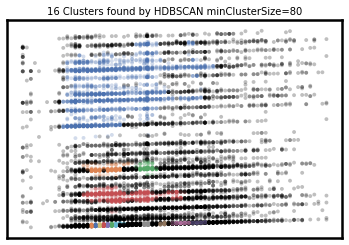

In [87]:
import hdbscan
algName = "HDBSCAN"
for minClusterSize in [80]:
    clusterParams = {'min_cluster_size':minClusterSize}
    start_time = time.time()
    hdbscanModel = hdbscan.HDBSCAN(**clusterParams)
    labels = hdbscanModel.fit_predict(data)
    # Subsequently, this will be invoked using a function call of the form
    # hdbscan, labels = w8s.fitClusterLabels(data, hdbscan.HDBSCAN, (), clusterParams)
    end_time = time.time()
    elapsed_time = end_time-start_time
    print(elapsed_time)
    
    plt.clf() # Start new plot
    nClusters = len(set(labels))
    title = '{} Clusters found by {} minClusterSize={}'.format(str(nClusters),algName,str(minClusterSize))
    plt = w8s.plot_2dClusters(data, labels, title, paletteName, fontSize, plot_kwds)
    outFile = 'pic/{}{}_{}_generated.pdf'.format(algName,str(nClusters),str(minClusterSize))
    plt.savefig(outFile)